####**Visualization of Results**

Introduction：
+ Test Model：Training_process2_Model_Resnet50_Light
+ Model Path：'./model/Formal_training_process1_model_resnet50_nnloss.pt'
+ Catalog of Test Imges：/content/drive/MyDrive/test_pic  【include group members】

## Test Image_1 `"001name.jpg"` ：Visualization
+ Test Image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
path="/content/drive/MyDrive/nn_facerecognition-master"
os.chdir(path)
os.listdir(path)
!python face_crop.py

## Application
+ Load Model
+ Load Picture
+ Forecast Result
+ Visualization of Results

In [3]:
import torch
import glob
import numpy as np
from torch import Tensor
import os
from MTCNN.detector import detect_faces
from MTCNN.visualization_utils import show_results
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageFont
import torchvision.transforms as transforms 
from face_crop import face_crop 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###Function to load Images

In [4]:
def load(img_path):
    
    mean = [0.485, 0.456, 0.406]
    std  = [0.229, 0.224, 0.225]

    img_transform = transforms.Compose([
        face_crop(),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ])

    img = Image.open(img_path)
    img = img_transform(img)
    
    ###############################
    # look over transform
    # image = trans(img)
    # print(type(image))
    # display(image)
    ###############################

    img = img.unsqueeze(0) # torch.Size([3, 2541, 1920]) -> torch.Size([1, 3, 2541, 1920])
    img = img.to(device)  
    return img


### Funcion to show result in Fan chart

In [5]:
def show_fan(outputs):
  
    top_p, top_k = torch.topk(outputs, 10, dim=1, largest=True, sorted=True, out=None)
    img = Image.open(img_path)
    bbox, landmarks = detect_faces(img)
    img =show_results(img, bbox)
    draw = ImageDraw.Draw(img)
    class_names = np.load("class_names.npy")
    name = class_names[top_k.squeeze()[0].item()]
    text = 'Similarity:{:.3f}\nLabel:{}'.format(top_p.squeeze()[0].item(),name)
    draw.text((bbox[0][0], bbox[0][1]), text, 'white')
    
    top_p = Tensor.cpu(top_p).numpy()
    z = list(top_p/top_p.sum())
    class_names = np.load("class_names.npy")
    explode = [0.3,0,0,0,0,0,0,0,0,0]
    heng = [ "" for j in range(10) ]
    for i in range(3):
      label_top10 = class_names[top_k.squeeze()[i].item()]
      heng[i] = label_top10
    plt.figure(figsize=(12,12))
    
    
    
    plt.figure(figsize=(17,8))
    plt.subplot(1,2,1)
    plt.title("Recognized Image \n {}".format(out_label),fontsize="x-large")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.pie(z, explode=explode, labels=heng, startangle=90, autopct='%1.0f%%', shadow=True,pctdistance=0.8)
    plt.title("Top10 Propotion of Similarity",fontsize="xx-large")
    plt.subplots_adjust(wspace =0.5, hspace =0)
    plt.show()
    top_p, top_k = torch.topk(outputs, 10, dim=1, largest=True, sorted=True, out=None)
    top_p = top_p[0].tolist()
    plt.figure(figsize=(19,19))
    plt.subplot(3,3,2)
    
    label_first = class_names[top_k.squeeze()[0].item()]
    pic_first = str(label_first) + "_0001" + ".jpg"
    first_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(label_first),pic_first)
    plt.title("Top1 Similarity:{}% \n {}".format('%.3f' %(top_p[0]*100),label_first),fontsize="x-large")
    first_img = Image.open(first_imgpath)
    plt.imshow(first_img)
    
    for i in range(1,4):
      label_s = class_names[top_k.squeeze()[i].item()]
      pic = str(label_s) + "_0001" + ".jpg"
      ref_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(label_s),pic)
      ref_img = Image.open(ref_imgpath)
      bbox_2, landmarks_2 = detect_faces(ref_img)
    

      plt.subplot(3,3,i+3)
      plt.title("Top{} Similarity:{}% \n {}".format(i+1,'%.3f' %(top_p[i]*100),label_s),fontsize="x-large")
      plt.imshow(ref_img)


### Funcion to show result in Bar chart

In [6]:
def show_chart(outputs):
    top_p, top_k = torch.topk(outputs, 10, dim=1, largest=True, sorted=True, out=None)
    img = Image.open(img_path)
    bbox, landmarks = detect_faces(img)
    img =show_results(img, bbox)
    draw = ImageDraw.Draw(img)
    class_names = np.load("class_names.npy")
    name = class_names[top_k.squeeze()[0].item()]
    text = 'Similarity:{:.5f}\nLabel:{}'.format(top_p.squeeze()[0].item(),name)
    draw.text((bbox[0][0], bbox[0][1]), text, 'white')

    
    top_p = Tensor.cpu(top_p).numpy()
    
    top_p = top_p[0].tolist()
    class_names = np.load("class_names.npy")
    heng = [ [] for j in range(10) ]
    for i in range(10):
      label_top10 = class_names[top_k.squeeze()[i].item()]
      heng[i] = label_top10
    
    plt.figure(figsize=(19,8))
    plt.subplot(1,2,1)
    ori_img = Image.open(img_path)
    plt.title("Recognized Image \n {}".format(out_label),fontsize="x-large")
    plt.imshow(img)
    plt.subplot(1,2,2)
    top_p=list(reversed(top_p))
    heng = list(reversed(heng))
    plt.barh(range(len(top_p)), top_p, tick_label = heng)
    plt.subplots_adjust(wspace =0.5, hspace =0)
    plt.title("Top10 Propotion of Similarity",fontsize="xx-large")
    plt.show()

    top_p=list(reversed(top_p))
    heng = list(reversed(heng))
    plt.figure(figsize=(19,19))
    plt.subplot(3,3,2)
    
    label_first = class_names[top_k.squeeze()[0].item()]
    pic_first = str(label_first) + "_0001" + ".jpg"
    ref_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(label_first),pic_first)
    first_img = Image.open(ref_imgpath)
    plt.title("Top1 Similarity:{}% \n {}".format('%.3f' %(top_p[0]*100),label_first),fontsize="x-large")
    plt.imshow(first_img)


    for i in range(1,4):
      label_s = class_names[top_k.squeeze()[i].item()]
      pic = str(label_s) + "_0001" + ".jpg"
      ref_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(label_s),pic)
      ref_img = Image.open(ref_imgpath)
    

      plt.subplot(3,3,i+3)
      plt.title("Top{} Similarity:{}% \n {}".format(i+1,'%.3f' %(top_p[i]*100),label_s),fontsize="x-large")
      plt.imshow(ref_img)

### Function to directly show the most similar result

In [7]:
def just_forecast_pic(outputs):
    top_p, top_k = torch.topk(outputs, 10, dim=1, largest=True, sorted=True, out=None)
    img = Image.open(img_path)
    bbox, landmarks = detect_faces(img)
    img =show_results(img, bbox)
    draw = ImageDraw.Draw(img)
    
    
    class_names = np.load("class_names.npy")
    name = class_names[top_k.squeeze()[0].item()]
    text = 'Similarity:{:.5f}\nLabel:{}'.format(top_p.squeeze()[0].item(),name)
    draw.text((bbox[0][0], bbox[0][1]), text, 'white') 


    pic = str(name) + "_0001" + ".jpg"
    ref_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(name),pic)
    ref_img = Image.open(ref_imgpath)

    plt.figure(figsize=(12,8)) 
    plt.subplot(1,2,1)
    plt.title("Recognized Image \n {}".format(out_label),fontsize="x-large")
    img = img.resize((500,500))
    plt.imshow(img)
    plt.subplot(1,2,2)

    label_first = class_names[top_k.squeeze()[0].item()]
    pic_first = str(label_first) + "_0001" + ".jpg"
    ref_imgpath = os.path.join(r"/content/drive/MyDrive/lfw",str(label_first),pic_first)
    first_img = Image.open(ref_imgpath)
    top_p = Tensor.cpu(top_p).numpy()
    top_p = top_p[0].tolist()
    plt.title("Top1 Similarity:{}% \n {} ".format('%.3f' %(top_p[0]*100),label_first),fontsize="x-large")
    plt.imshow(first_img)


##### **Funcion to easier run other Functions**

###Three kinds of Methodes to show the results:
### <1>  fan:  which show results in Fan chart
### <2>  chart :which show results in Bar chart
### <3>  forecast :which direct show the forecast results 

In [8]:
#All the Models and Images are saved in a Document,and path be imported as a List
model_path_list = glob.glob(os.path.join("/content/drive/MyDrive/model", '*.pt'))
img_path_list = glob.glob(os.path.join("/content/drive/MyDrive/test_pic/inter", '*.jpg'))
print(model_path_list)

['/content/drive/MyDrive/model/Training_4_Res_NLLLoss_1FC_100e.pt', '/content/drive/MyDrive/model/Training_5_Res_NLLLoss_1FC_100e_SP.pt', '/content/drive/MyDrive/model/Formal_training_process3_model_resnet50_light.pt', '/content/drive/MyDrive/model/Training_1_Res_NLLLoss_2FC_200e.pt', '/content/drive/MyDrive/model/Training_2_Res_NLLLoss_1FC_50e.pt']


In [9]:

def Visualization(choise,img_path,model_path):
    model=torch.load(model_path).to(device)
    with torch.no_grad():
      log_ps = model.forward(load(img_path))
      outputs = torch.exp(log_ps)
    if choise == "fan":
      show_fan(outputs)
    if choise == "chart":
      show_chart(outputs)
    if choise=="forcast":  
      just_forecast_pic(outputs)

###  According the way, model,Imgas which we chooce show the results out

#Model<1>:Training_4_Res_NLLLoss_1FC_100e Model<2>Training_5_Res_NLLLoss_1FC_100e_SP
#Model<3>Formal_training_process3_model_resnet50_light
#Model<4>Training_1_Res_NLLLoss_2FC_200e
#Model<5>Training_2_Res_NLLLoss_1FC_50e.pt']

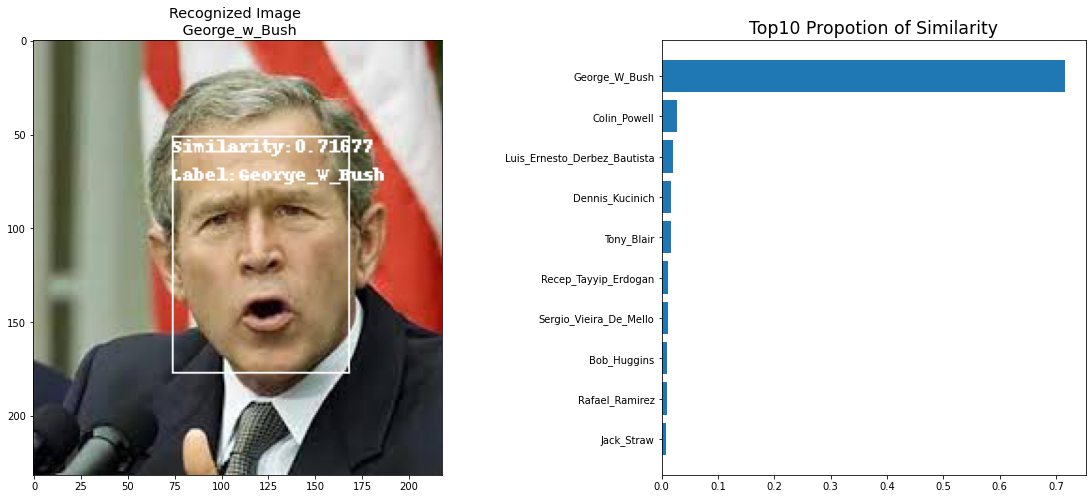

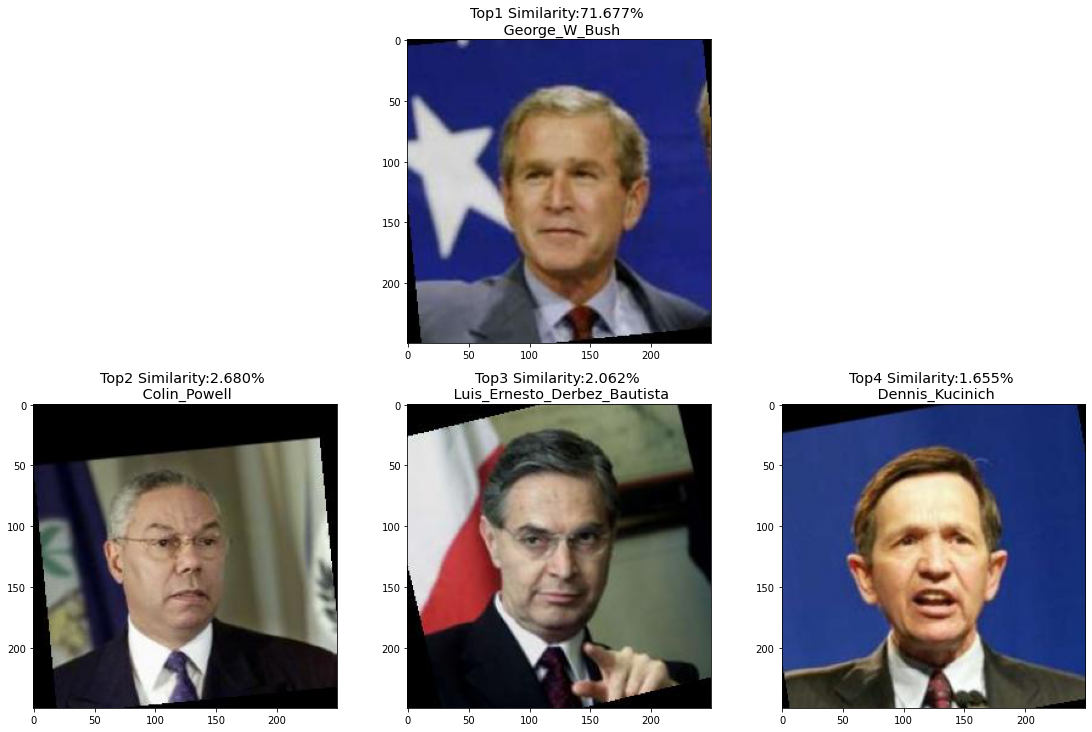

In [12]:
model_num=2    #number of which model you choose
img_num=2    #num of which image we choose
model_path = model_path_list[model_num-1]
img_path = img_path_list[img_num-1]
out_label="".join(list(img_path)[38:len(list(img_path))-4])
Visualization("chart",img_path,model_path)

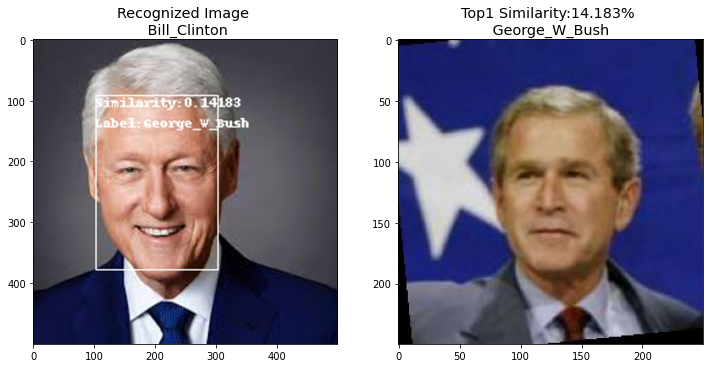

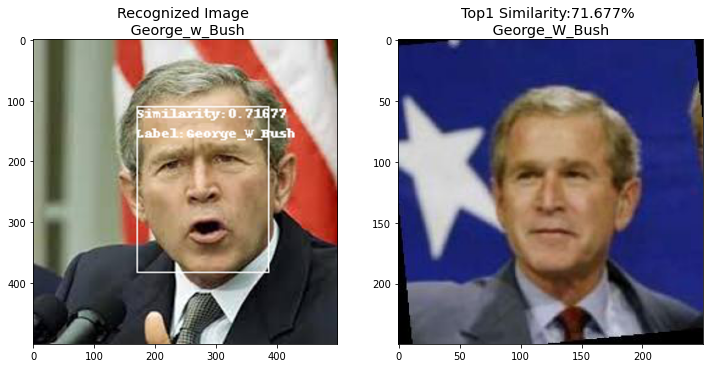

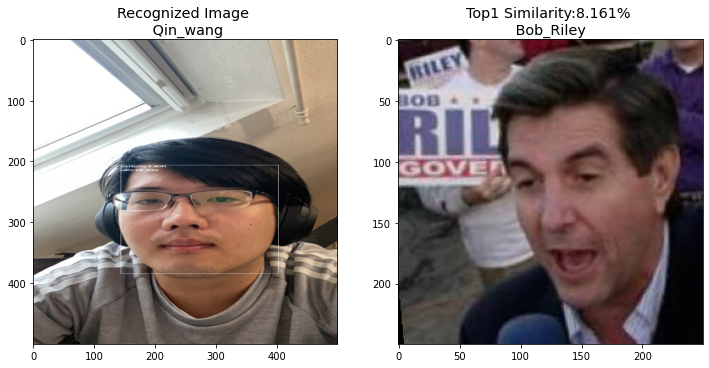

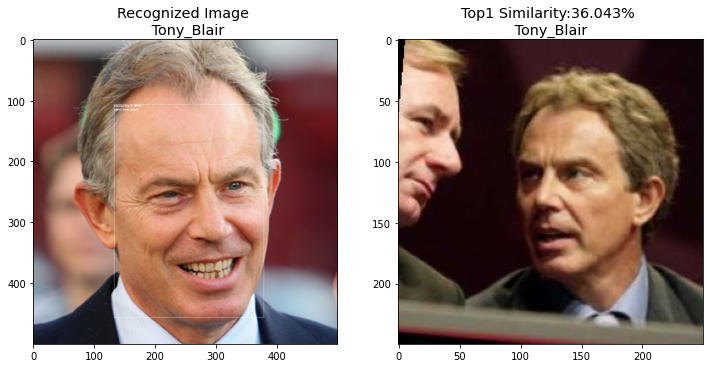

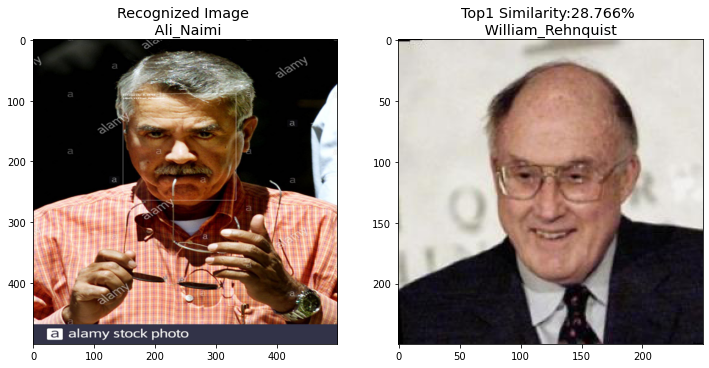

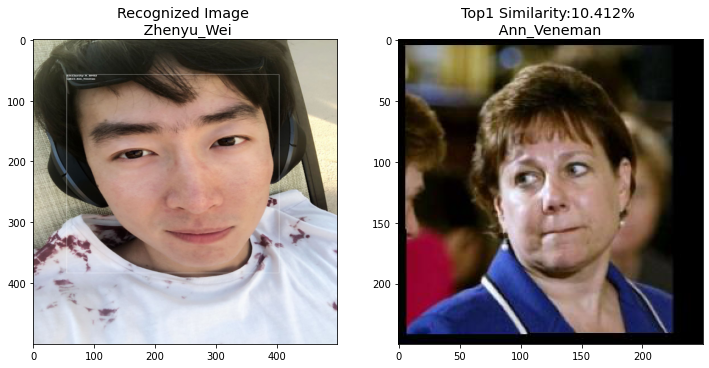

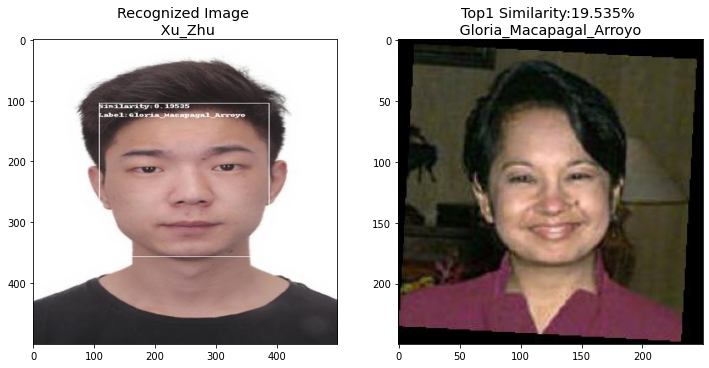

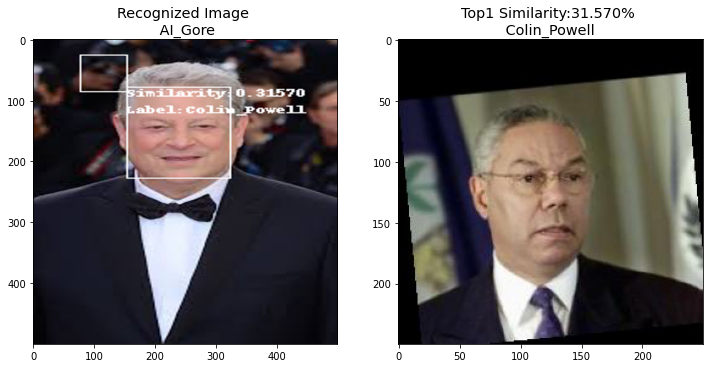

In [13]:
model_path = model_path_list[model_num-1]
for img_path in img_path_list:
  out_label="".join(list(img_path)[38:len(list(img_path))-4])
  Visualization("forcast",img_path,model_path)